In [2]:
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')

In [3]:
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

sklearn 0.23.2
matplotlib 3.3.2
numpy 1.19.2
pandas 1.1.3
pandas_datareader 0.9.0


In [4]:
#Getting the dataset
df= web.DataReader('NIO',data_source='yahoo',start='2018-10-01', end='2020-12-25')

In [5]:
#Showing the dataset
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,7.080000,6.600000,7.060000,6.600000,16429100,6.600000
2018-10-02,6.600000,5.870000,6.600000,5.930000,19440000,5.930000
2018-10-03,6.550000,6.120000,6.120000,6.300000,13251200,6.300000
2018-10-04,6.250000,6.000000,6.190000,6.250000,11896600,6.250000
2018-10-05,6.290000,6.030000,6.200000,6.260000,8378300,6.260000
...,...,...,...,...,...,...
2020-12-18,48.000000,45.520000,45.889999,46.720001,126251100,46.720001
2020-12-21,49.490002,45.020000,45.630001,48.950001,132558100,48.950001
2020-12-22,49.840000,46.529999,49.610001,47.580002,117118300,47.580002


In [6]:
#Getting the number of trading days of the dataset
df.shape

(564, 6)

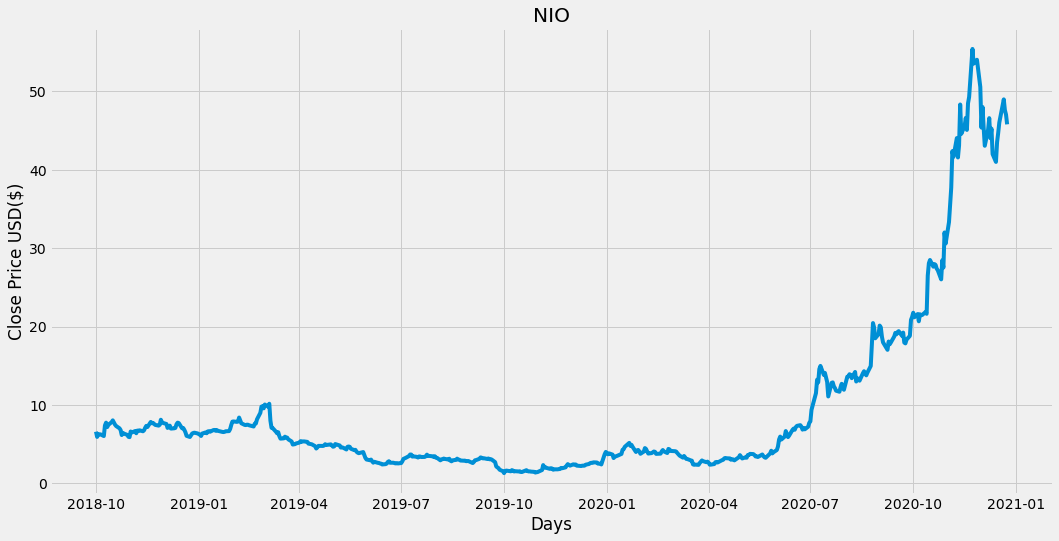

In [7]:
#Visualizing the close price of the data
plt.figure(figsize=(16,8))
plt.title('NIO')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()

In [8]:
# getting the close price 
df = df[['Close']].copy()
df.head()

,Close
Date,
2018-10-01,6.60
2018-10-02,5.93
2018-10-03,6.30
2018-10-04,6.25
2018-10-05,6.26


In [11]:
#Create a veriable to predict 'x' days out into the futures

future_days=25
#creating a new colum that's the target data.
#data shifted x units/days
df['Prediction'] = df.loc[:,['Close']].shift(-future_days)
df.tail(26)

,Close,Prediction
Date,,
2020-11-18,45.060001,45.77
2020-11-19,48.450001,NaN
2020-11-20,49.250000,NaN
2020-11-23,55.380001,NaN
2020-11-24,53.509998,NaN
2020-11-25,53.689999,NaN
2020-11-27,54.000000,NaN
2020-11-30,50.529999,NaN
2020-12-01,45.360001,NaN


In [35]:
#Create new feature dataset called data (x) and conver it to a numpy array
# And remove the last 'x' row/days

X = np.array(df.drop(['Prediction'],1))[:-future_days]
X

array([[ 6.5999999 ],
       [ 5.92999983],
       [ 6.30000019],
       [ 6.25      ],
       [ 6.26000023],
       [ 6.03999996],
       [ 7.38999987],
       [ 7.75      ],
       [ 7.17999983],
       [ 7.46000004],
       [ 7.82000017],
       [ 8.03999996],
       [ 7.76999998],
       [ 7.5       ],
       [ 7.32000017],
       [ 7.03000021],
       [ 6.80999994],
       [ 6.17000008],
       [ 6.44999981],
       [ 6.3499999 ],
       [ 6.19000006],
       [ 5.94999981],
       [ 5.9000001 ],
       [ 6.61999989],
       [ 6.48999977],
       [ 6.67999983],
       [ 6.4000001 ],
       [ 6.73999977],
       [ 6.69000006],
       [ 6.76999998],
       [ 6.6500001 ],
       [ 6.78000021],
       [ 7.0999999 ],
       [ 7.34000015],
       [ 7.19000006],
       [ 7.84000015],
       [ 7.67000008],
       [ 7.71000004],
       [ 7.46000004],
       [ 7.36999989],
       [ 7.48000002],
       [ 8.11999989],
       [ 7.78999996],
       [ 7.71000004],
       [ 7.57999992],
       [ 7

In [37]:
#Create the target dataset(y) and conver it to a numpy array 
#And get all of the target vlaues excepts the last x rows
Y=np.array(df['Prediction'])[:-future_days]
Y

array([ 6.67999983,  6.4000001 ,  6.73999977,  6.69000006,  6.76999998,
        6.6500001 ,  6.78000021,  7.0999999 ,  7.34000015,  7.19000006,
        7.84000015,  7.67000008,  7.71000004,  7.46000004,  7.36999989,
        7.48000002,  8.11999989,  7.78999996,  7.71000004,  7.57999992,
        7.07999992,  7.36999989,  6.98999977,  7.03000021,  7.07999992,
        7.53999996,  7.75      ,  7.69999981,  7.03000021,  7.07000017,
        6.82999992,  6.51999998,  6.07000017,  5.92000008,  6.36000013,
        6.42999983,  6.46999979,  6.36999989,  6.19999981,  6.05000019,
        6.36000013,  6.5       ,  6.4000001 ,  6.63000011,  6.65999985,
        6.59000015,  6.80000019,  6.82000017,  6.71000004,  6.80999994,
        6.71000004,  6.57000017,  6.55000019,  6.57999992,  6.6500001 ,
        6.67000008,  6.94000006,  7.46000004,  7.88000011,  7.9000001 ,
        7.8499999 ,  7.88000011,  8.39999962,  8.03999996,  7.67000008,
        7.46000004,  7.44000006,  7.48999977,  7.48000002,  7.40

In [67]:
#spliting the data into 65% training and 35% testing 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.45)

In [68]:
#Create the model
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train,y_train)


In [74]:
#Get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[28.06999969],
       [28.47999954],
       [27.62999916],
       [27.95999908],
       [27.86000061],
       [27.37999916],
       [27.15999985],
       [26.01000023],
       [28.44000053],
       [27.51000023],
       [31.98999977],
       [30.57999992],
       [33.31999969],
       [35.5       ],
       [37.70999908],
       [42.34999847],
       [41.63000107],
       [44.02000046],
       [41.54999924],
       [43.08000183],
       [48.29999924],
       [44.56000137],
       [45.58000183],
       [46.59000015],
       [45.06000137]])

In [75]:
#Show the model tree prediction 
tree_prediction =tree.predict(x_future)
tree_prediction


array([53.50999832, 53.50999832, 55.38000107, 53.50999832, 53.68999863,
       45.34999847, 45.34999847, 45.36000061, 53.50999832, 45.34999847,
       43.04000092, 43.04000092, 43.04000092, 44.00999832, 45.22000122,
       40.97999954, 40.97999954, 43.5       , 44.66999817, 46.        ,
       46.72000122, 48.95000076, 45.77000046, 45.77000046, 45.77000046])

In [76]:
#Show the linear regression predictions 
lr_prediction = lr.predict(x_future)
lr_prediction

array([35.87552423, 36.40576249, 35.30648714, 35.73326434, 35.60393986,
       34.98317101, 34.6986537 , 33.21139999, 36.35403319, 35.15129678,
       40.94512128, 39.12161849, 42.66516301, 45.48448008, 48.34259351,
       54.34334014, 53.41219303, 56.50309447, 53.3087295 , 55.28742759,
       62.03826508, 57.2014585 , 58.52058891, 59.82678392, 57.84809076])

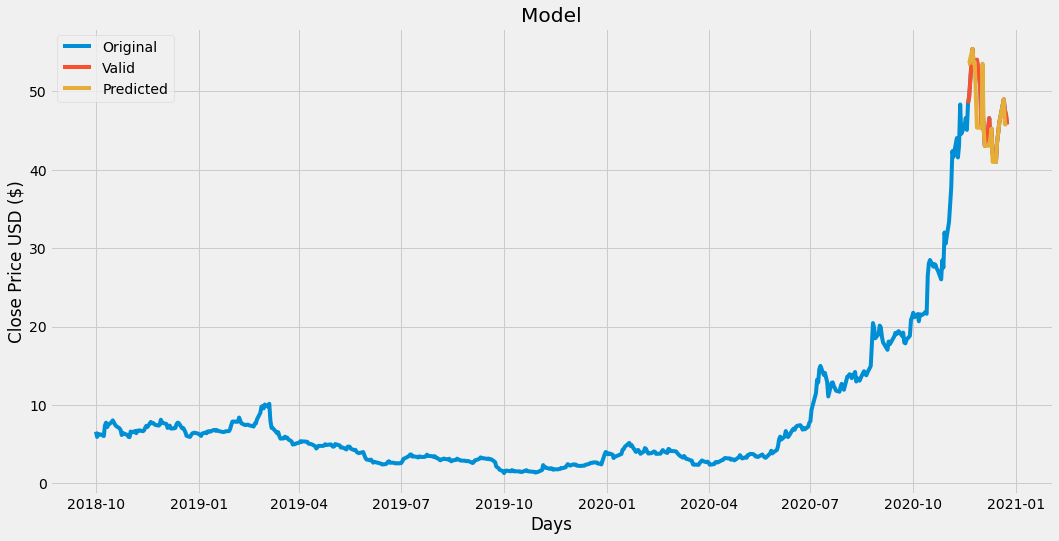

In [77]:
#Visualizing the data
predictions = tree_prediction

valid = df[X.shape[0]:].copy()
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Valid',"Predicted"])

#Wow Tree is very close

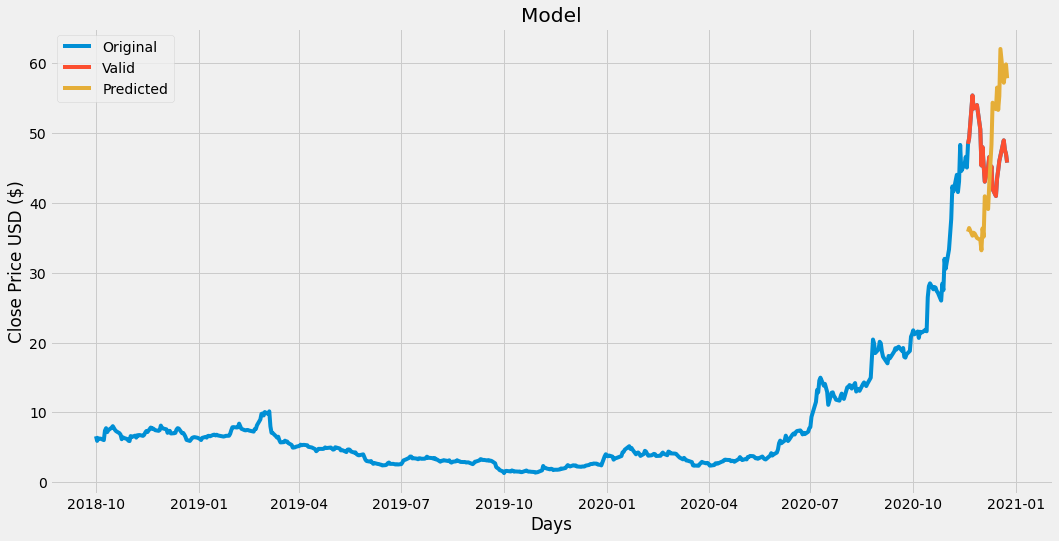

In [78]:
#Visualizing the data
predictions = lr_prediction

valid = df[X.shape[0]:].copy()
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Valid',"Predicted"])

#LR is wrost than Tree